#  Prediction using Supervised ML

#### To Predict the percentage of marks of the students based on the number of hours they studied

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [6]:
path_link="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(path_link)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
#First 5 Records
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
#last 5 Records
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


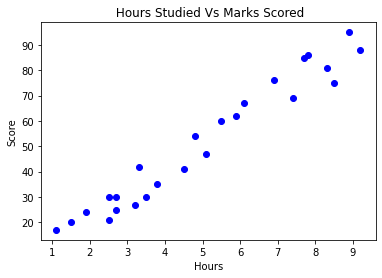

In [20]:
# Plotting the above data for further valuation
plt.xlabel("Hours",size=10)
plt.ylabel("Score",size=10)
plt.title(" Hours Studied Vs Marks Scored")
plt.scatter(data.Hours,data.Scores,color="blue")
plt.show()

### Here we can see a relationship between hours studied and marks scored. So we will plot a regression line to confirm the same

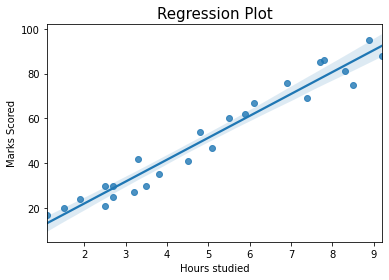

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [21]:
sns.regplot(x=data['Hours'],y=data["Scores"])
plt.title("Regression Plot",size=15)
plt.xlabel("Hours studied",size=10)
plt.ylabel("Marks Scored",size=10)
plt.show()
print(data.corr())



#### We can Observe that the variables are positively co-related.

# Training Model

### 1) Splitting the Given Data

In [24]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

#Splitting Data in Two
train_x,val_x,train_y,val_y= train_test_split(x,y,random_state=0)

### 2)  Fitting data into model 

In [27]:
regression= LinearRegression()
regression.fit(train_x,train_y)
print(" Model Trained")

 Model Trained


## Predicting the Percentage of Marks 

In [32]:
pred_y=regression.predict(val_x)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_x], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## Comparing Predicted Marks With Actual Marks 

In [33]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Visually Comparing Predicted Marks With Actual Marks

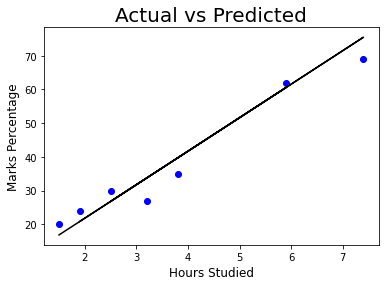

In [35]:
plt.scatter(x=val_x, y=val_y, color='blue')
plt.plot(val_x, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## Evaluating The Model

In [36]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


### What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [39]:
Hours = [9.25]
answer = regression.predict([Hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


#### According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks